2024 - 7 - 30

1446, ٱلْمُحَرَّم 24

Page View Time Series Visualizer

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_csv("fcc-forum-pageviews.csv")
Data["date"] = pd.to_datetime(Data["date"])
Data = Data.set_index('date')
Data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
Data = Data.rename(columns={"value": "views"})
Data

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
Clean_Data = Data[
    (Data['views'] >= Data['views'].quantile(0.025)) &
    (Data['views'] <= Data['views'].quantile(0.975)) 
]
Clean_Data

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'page views')

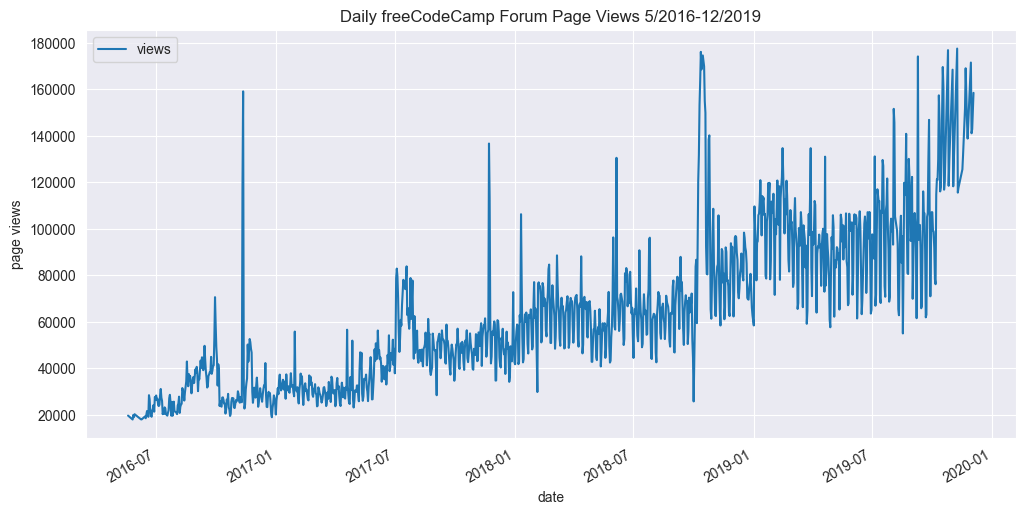

In [7]:
Line = Clean_Data.plot(figsize=(12, 6))
Line.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
Line.set_ylabel("page views")

In [8]:
bar = Clean_Data.copy()
bar["Years"] = bar.index.year
bar["Months"] = bar.index.month_name()
bar = pd.DataFrame(bar.groupby(["Years", "Months"], sort=False)["views"].mean().round().astype(int))
bar = bar.rename(columns={"views": "Average Page Views"})
bar = bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

C:\Users\abdul\AppData\Local\Temp\ipykernel_3928\3997696034.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


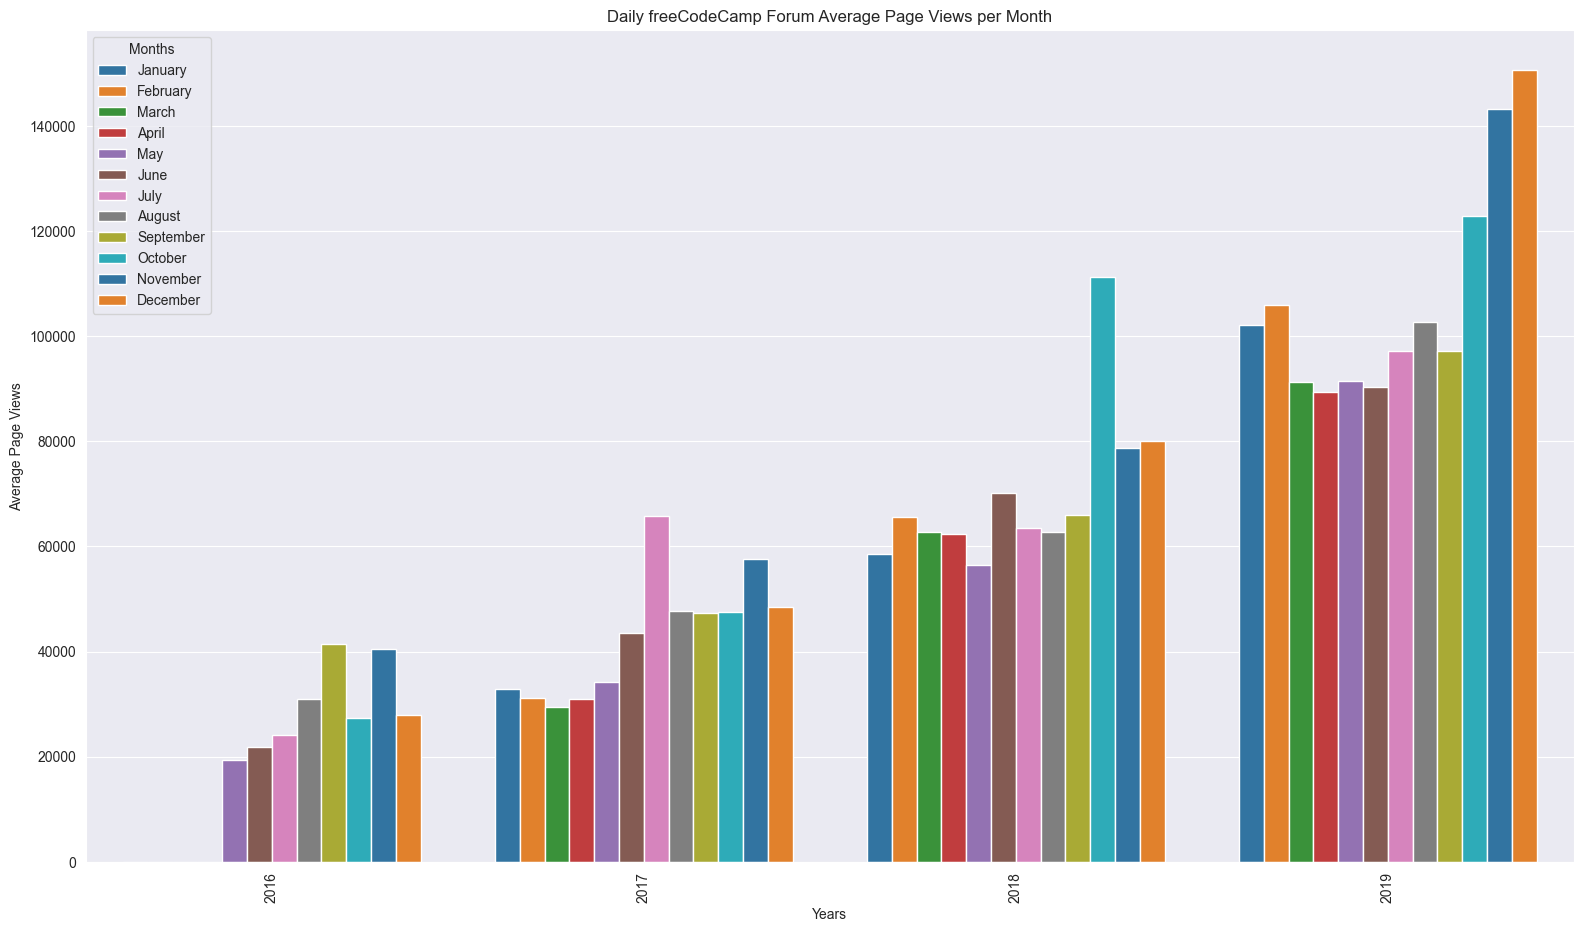

In [9]:
bar = pd.concat([pd.DataFrame(missing_data), bar])


fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


fig.savefig('bar_plot.png')

In [19]:
df_box = Data.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

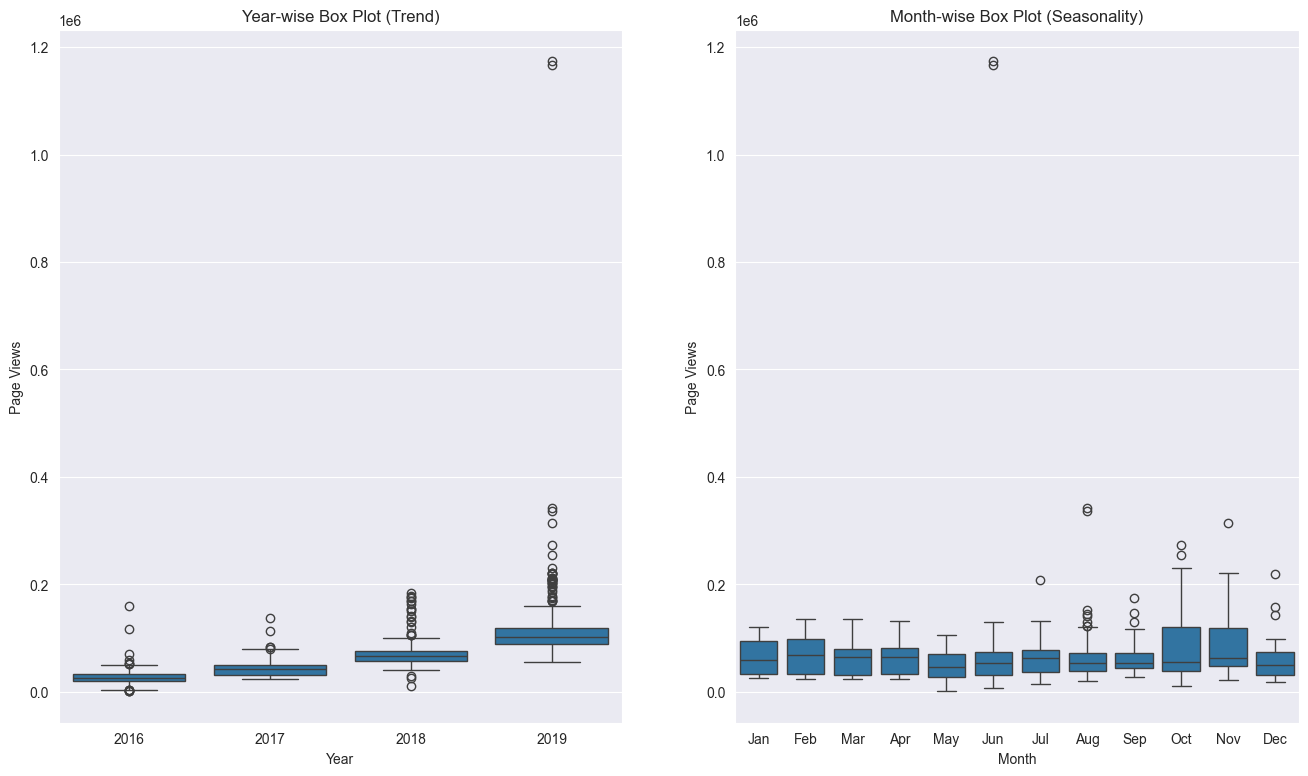

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    
sns.boxplot(data=df_box, x="year", y="views", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="views", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")